In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/IoTProcessed_Data.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB


In [4]:
df.describe()

tempreature      humidity   water_level             N             P  \
count  37922.000000  37922.000000  37922.000000  37922.000000  37922.000000   
mean      18.760113     50.329308     79.401587    231.963610    234.123332   
std        7.143422     22.995645     36.824610     34.718121     31.452138   
min        3.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.000000     49.000000     79.000000    185.000000    190.000000   
50%       17.000000     59.000000    100.000000    255.000000    255.000000   
75%       25.000000     62.000000    100.000000    255.000000    255.000000   
max       41.000000    100.000000    100.000000    255.000000    255.000000   

                  K  Fan_actuator_OFF  Fan_actuator_ON  \
count  37922.000000      37922.000000     37922.000000   
mean     225.171879          0.689863         0.310137   
std       44.877635          0.462555         0.462555   
min        0.000000          0.000000         0.000000   
25%      160.000000          0.000000         0.000000   
50%      255.000000          1.000000         0.000000   
75%      255.000000          1.000000         1.000000   
max      259.000000          1.000000         1.000000   

       Watering_plant_pump_OFF  Watering_plant_pump_ON  \
count             37922.000000            37922.000000   
mean                  0.762091                0.237909   
std                   0.425809                0.425809   
min                   0.000000                0.000000   
25%                   1.000000                0.000000   
50%                   1.000000                0.000000   
75%                   1.000000                0.000000   
max                   1.000000                1.000000   

       Water_pump_actuator_OFF  Water_pump_actuator_ON  
count             37922.000000            37922.000000  
mean                  0.774142                0.225858  
std                   0.418152                0.418152  
min                   0.000000                0.000000  
25%                   1.000000                0.000000  
50%                   1.000000                0.000000  
75%                   1.000000                0.000000  
max                   1.000000                1.000000

## Data Cleaning and Pre processing

Feature Engineering

TypeError: 'tuple' object is not callable

In [8]:
# Converting the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now applying the time-based feature extraction
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

df.head()

date  tempreature  humidity  water_level    N    P    K  \
0 2024-02-08 06:10:00           41        63          100  255  255  255   
1 2024-02-08 06:15:00           41        59          100  255  255  255   
2 2024-02-08 06:20:00           41        62          100  255  255  255   
3 2024-02-08 06:05:00           40        60          100  255  255  255   
4 2024-02-08 06:00:00           39        61          100  255  255  255   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  \
0               0.0              1.0                      1.0   
1               0.0              1.0                      1.0   
2               0.0              1.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              1.0                      1.0   

   Watering_plant_pump_ON  Water_pump_actuator_OFF  Water_pump_actuator_ON  \
0                     0.0                      1.0                     0.0   
1                     0.0                      1.0                     0.0   
2                     0.0                      1.0                     0.0   
3                     0.0                      1.0                     0.0   
4                     0.0                      1.0                     0.0   

   hour  day  dayofweek  month  
0   6.0  8.0        3.0    2.0  
1   6.0  8.0        3.0    2.0  
2   6.0  8.0        3.0    2.0  
3   6.0  8.0        3.0    2.0  
4   6.0  8.0        3.0    2.0

In [9]:
# Step 2: Interaction terms between key variables
# Temperature * Humidity interaction
df['temp_humidity_interaction'] = df['tempreature'] * df['humidity']

# Water Level * Nutrients (N, P, K)
df['water_n_interaction'] = df['water_level'] * df['N']
df['water_p_interaction'] = df['water_level'] * df['P']
df['water_k_interaction'] = df['water_level'] * df['K']

# Fan Actuator ON * Temperature interaction
df['fan_temp_interaction'] = df['Fan_actuator_ON'] * df['tempreature']

# Step 3: Duration calculations for actuator states
# Cumulative duration for Fan, Watering plant pump, and Water pump
df['fan_duration'] = df['Fan_actuator_ON'].cumsum() - df['Fan_actuator_OFF'].cumsum()
df['watering_pump_duration'] = df['Watering_plant_pump_ON'].cumsum() - df['Watering_plant_pump_OFF'].cumsum()
df['water_pump_duration'] = df['Water_pump_actuator_ON'].cumsum() - df['Water_pump_actuator_OFF'].cumsum()

# Step 4: Lag features
# Lag of 1 hour for Temperature and Humidity
df['temp_lag_1'] = df['tempreature'].shift(1)
df['humidity_lag_1'] = df['humidity'].shift(1)

# Step 5: Cumulative features
# Cumulative water usage (sum of water levels)
df['cumulative_water'] = df['water_level'].cumsum()

# Step 6: Binary indicator for system activity (any actuator ON)
df['system_active'] = (
    (df['Fan_actuator_ON'] == 1) |
    (df['Watering_plant_pump_ON'] == 1) |
    (df['Water_pump_actuator_ON'] == 1)
).astype(int)

In [10]:
df.head()

date  tempreature  humidity  water_level    N    P    K  \
0 2024-02-08 06:10:00           41        63          100  255  255  255   
1 2024-02-08 06:15:00           41        59          100  255  255  255   
2 2024-02-08 06:20:00           41        62          100  255  255  255   
3 2024-02-08 06:05:00           40        60          100  255  255  255   
4 2024-02-08 06:00:00           39        61          100  255  255  255   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  ...  \
0               0.0              1.0                      1.0  ...   
1               0.0              1.0                      1.0  ...   
2               0.0              1.0                      1.0  ...   
3               0.0              1.0                      1.0  ...   
4               0.0              1.0                      1.0  ...   

   water_p_interaction  water_k_interaction  fan_temp_interaction  \
0                25500                25500                  41.0   
1                25500                25500                  41.0   
2                25500                25500                  41.0   
3                25500                25500                  40.0   
4                25500                25500                  39.0   

   fan_duration  watering_pump_duration  water_pump_duration  temp_lag_1  \
0           1.0                    -1.0                 -1.0         NaN   
1           2.0                    -2.0                 -2.0        41.0   
2           3.0                    -3.0                 -3.0        41.0   
3           4.0                    -4.0                 -4.0        41.0   
4           5.0                    -5.0                 -5.0        40.0   

   humidity_lag_1  cumulative_water  system_active  
0             NaN               100              1  
1            63.0               200              1  
2            59.0               300              1  
3            62.0               400              1  
4            60.0               500              1  

[5 rows x 29 columns]

## Checking for Missing Values

In [11]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Display the result
missing_values

date                         2
tempreature                  0
humidity                     0
water_level                  0
N                            0
P                            0
K                            0
Fan_actuator_OFF             0
Fan_actuator_ON              0
Watering_plant_pump_OFF      0
Watering_plant_pump_ON       0
Water_pump_actuator_OFF      0
Water_pump_actuator_ON       0
hour                         2
day                          2
dayofweek                    2
month                        2
temp_humidity_interaction    0
water_n_interaction          0
water_p_interaction          0
water_k_interaction          0
fan_temp_interaction         0
fan_duration                 0
watering_pump_duration       0
water_pump_duration          0
temp_lag_1                   1
humidity_lag_1               1
cumulative_water             0
system_active                0
dtype: int64

In [13]:
# Step 1: Forward fill the missing values in the 'date' column and the related time features
df['date'].fillna(method='ffill', inplace=True)
df['hour'].fillna(method='ffill', inplace=True)
df['day'].fillna(method='ffill', inplace=True)
df['dayofweek'].fillna(method='ffill', inplace=True)
df['month'].fillna(method='ffill', inplace=True)

# Option 2: Fill with current values (assuming the lag should match if no previous value is available)
df['temp_lag_1'].fillna(df['tempreature'], inplace=True)
df['humidity_lag_1'].fillna(df['humidity'], inplace=True)

# Checking for remaining missing values
missing_values_after_lags = df[['temp_lag_1', 'humidity_lag_1']].isnull().sum()

<ipython-input-13-1aa4012ad181>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'].fillna(method='ffill', inplace=True)
<ipython-input-13-1aa4012ad181>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['hour'].fillna(method='ffill', inplace=True)
<ipython-input-13-1aa4012ad181>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['day'].fillna(method='ffill', inplace=True)
<ipython-input-13-1aa4012ad181>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dayofweek'].fillna(method='ffill', inplace=True)
<ipython-input-13-1aa4012ad181>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future versi

### Outlier Check

In [14]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']):  # Only for numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Find outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
    return outliers

# Checking for outliers
outliers = detect_outliers_iqr(df)

# Display the result
outliers

{'tempreature': 0,
 'humidity': 7589,
 'water_level': 7044,
 'N': 3,
 'P': 3,
 'K': 2,
 'Fan_actuator_OFF': 0,
 'Fan_actuator_ON': 0,
 'Watering_plant_pump_OFF': 9022,
 'Watering_plant_pump_ON': 9022,
 'Water_pump_actuator_OFF': 8565,
 'Water_pump_actuator_ON': 8565,
 'hour': 0,
 'day': 0,
 'dayofweek': 0,
 'month': 0,
 'temp_humidity_interaction': 279,
 'water_n_interaction': 5008,
 'water_p_interaction': 5857,
 'water_k_interaction': 0,
 'fan_temp_interaction': 0,
 'fan_duration': 0,
 'watering_pump_duration': 0,
 'water_pump_duration': 0,
 'temp_lag_1': 0,
 'humidity_lag_1': 7589,
 'cumulative_water': 0,
 'system_active': 0}

### Data Type Conversion

In [15]:
# First, let's check the current data types of the columns
df.dtypes

date                         datetime64[ns]
tempreature                           int64
humidity                              int64
water_level                           int64
N                                     int64
P                                     int64
K                                     int64
Fan_actuator_OFF                    float64
Fan_actuator_ON                     float64
Watering_plant_pump_OFF             float64
Watering_plant_pump_ON              float64
Water_pump_actuator_OFF             float64
Water_pump_actuator_ON              float64
hour                                float64
day                                 float64
dayofweek                           float64
month                               float64
temp_humidity_interaction             int64
water_n_interaction                   int64
water_p_interaction                   int64
water_k_interaction                   int64
fan_temp_interaction                float64
fan_duration                        float64
watering_pump_duration              float64
water_pump_duration                 float64
temp_lag_1                          float64
humidity_lag_1                      float64
cumulative_water                      int64
system_active                         int64
dtype: object

In [16]:
# Converting time-related columns to integer
df['hour'] = df['hour'].astype(int, errors='ignore')
df['day'] = df['day'].astype(int, errors='ignore')
df['dayofweek'] = df['dayofweek'].astype(int, errors='ignore')
df['month'] = df['month'].astype(int, errors='ignore')

# Converting binary actuator columns to integers
binary_columns = [
    'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
    'Watering_plant_pump_ON', 'Water_pump_actuator_OFF', 'Water_pump_actuator_ON',
    'system_active'
]
df[binary_columns] = df[binary_columns].astype(int)

# Checking the data types again after conversion
df.dtypes

date                         datetime64[ns]
tempreature                           int64
humidity                              int64
water_level                           int64
N                                     int64
P                                     int64
K                                     int64
Fan_actuator_OFF                      int64
Fan_actuator_ON                       int64
Watering_plant_pump_OFF               int64
Watering_plant_pump_ON                int64
Water_pump_actuator_OFF               int64
Water_pump_actuator_ON                int64
hour                                  int64
day                                   int64
dayofweek                             int64
month                                 int64
temp_humidity_interaction             int64
water_n_interaction                   int64
water_p_interaction                   int64
water_k_interaction                   int64
fan_temp_interaction                float64
fan_duration                        float64
watering_pump_duration              float64
water_pump_duration                 float64
temp_lag_1                          float64
humidity_lag_1                      float64
cumulative_water                      int64
system_active                         int64
dtype: object

In [18]:
# 1. Custom Target Variable Based on Environmental Conditions
def classify_plant_health(row):
    if (0.4 <= row['tempreature'] <= 0.6) and (0.4 <= row['humidity'] <= 0.7) and \
       (0.7 <= row['water_level'] <= 1.0) and (0.7 <= row['N'] <= 1.0) and \
       (0.7 <= row['P'] <= 1.0) and (0.7 <= row['K'] <= 1.0):
        return 'Healthy'
    else:
        return 'Unhealthy'

df['plant_health_custom'] = df.apply(classify_plant_health, axis=1)

# 2. System Activity-Based Target Variable
# Assume 'system_active' = 0 implies Healthy and 1 implies Unhealthy
df['plant_health_system'] = df['system_active'].apply(lambda x: 'Unhealthy' if x == 1 else 'Healthy')

# Checking the new target columns
df[['plant_health_custom', 'plant_health_system']].head()

plant_health_custom plant_health_system
0           Unhealthy           Unhealthy
1           Unhealthy           Unhealthy
2           Unhealthy           Unhealthy
3           Unhealthy           Unhealthy
4           Unhealthy           Unhealthy

## Exploratory Data Analysis

In [17]:
# Generating summary statistics for the dataset
summary_statistics = df.describe()

summary_statistics

date   tempreature      humidity  \
count                          37922  37922.000000  37922.000000   
mean   2024-01-13 04:19:08.047043840     18.760113     50.329308   
min              2023-11-27 06:26:00      3.000000      0.000000   
25%              2023-12-29 03:28:00     13.000000     49.000000   
50%              2024-01-12 06:43:00     17.000000     59.000000   
75%              2024-01-26 23:04:45     25.000000     62.000000   
max              2024-03-30 05:24:00     41.000000    100.000000   
std                              NaN      7.143422     22.995645   

        water_level             N             P             K  \
count  37922.000000  37922.000000  37922.000000  37922.000000   
mean      79.401587    231.963610    234.123332    225.171879   
min        0.000000      0.000000      0.000000      0.000000   
25%       79.000000    185.000000    190.000000    160.000000   
50%      100.000000    255.000000    255.000000    255.000000   
75%      100.000000    255.000000    255.000000    255.000000   
max      100.000000    255.000000    255.000000    259.000000   
std       36.824610     34.718121     31.452138     44.877635   

       Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  ...  \
count      37922.000000     37922.000000             37922.000000  ...   
mean           0.689863         0.310137                 0.762091  ...   
min            0.000000         0.000000                 0.000000  ...   
25%            0.000000         0.000000                 1.000000  ...   
50%            1.000000         0.000000                 1.000000  ...   
75%            1.000000         1.000000                 1.000000  ...   
max            1.000000         1.000000                 1.000000  ...   
std            0.462555         0.462555                 0.425809  ...   

       water_p_interaction  water_k_interaction  fan_temp_interaction  \
count         37922.000000         37922.000000          37922.000000   
mean          18534.465429         17798.505854              8.705923   
min               0.000000             0.000000              0.000000   
25%           15960.000000         13760.000000              0.000000   
50%           25500.000000         25500.000000              0.000000   
75%           25500.000000         25500.000000             25.000000   
max           25500.000000         25500.000000             41.000000   
std            9197.878466          9373.337168             13.092964   

       fan_duration  watering_pump_duration  water_pump_duration  \
count  37922.000000            37922.000000         37922.000000   
mean     913.140473            -8868.135146         -8111.395100   
min   -14400.000000           -19878.000000        -20792.000000   
25%    -4919.750000           -14875.000000        -12587.750000   
50%     2280.500000            -8985.500000         -6802.000000   
75%     7020.750000            -2049.250000         -3194.000000   
max    11759.000000               -1.000000            -1.000000   
std     7349.330347             6187.537007          5864.404136   

         temp_lag_1  humidity_lag_1  cumulative_water  system_active  
count  37922.000000    37922.000000      3.792200e+04   37922.000000  
mean      18.761115       50.329413      1.394578e+06       0.553531  
min        3.000000        0.000000      1.000000e+02       0.000000  
25%       13.000000       49.000000      6.495160e+05       0.000000  
50%       17.000000       59.000000      1.330656e+06       1.000000  
75%       25.000000       62.000000      2.118136e+06       1.000000  
max       41.000000      100.000000      3.011067e+06       1.000000  
std        7.143876       22.995694      8.624695e+05       0.497133  

[8 rows x 29 columns]

### Univariate Analysis

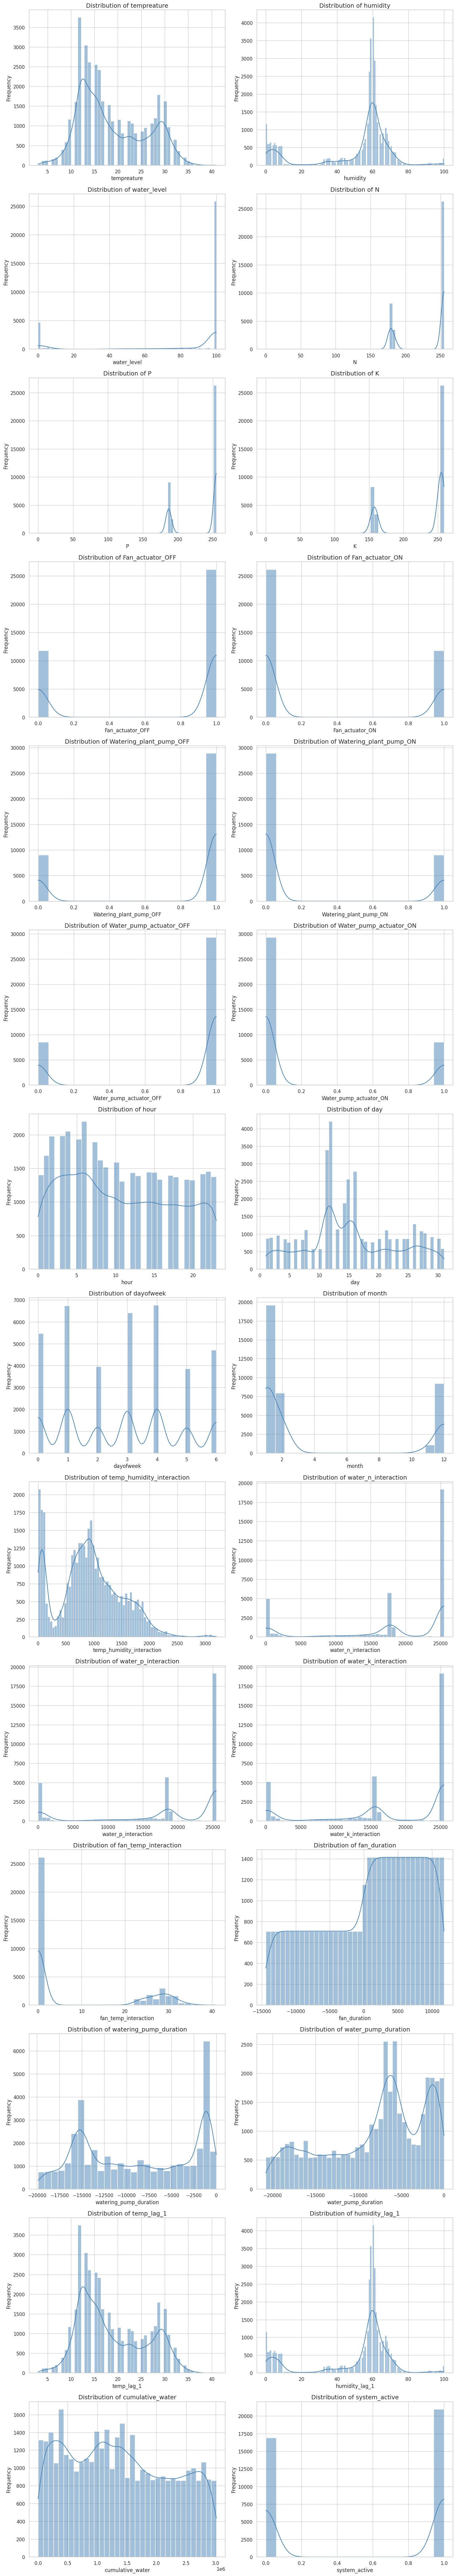

<ipython-input-21-d3092a1328f1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette="Set2")
<ipython-input-21-d3092a1328f1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette="Set2")


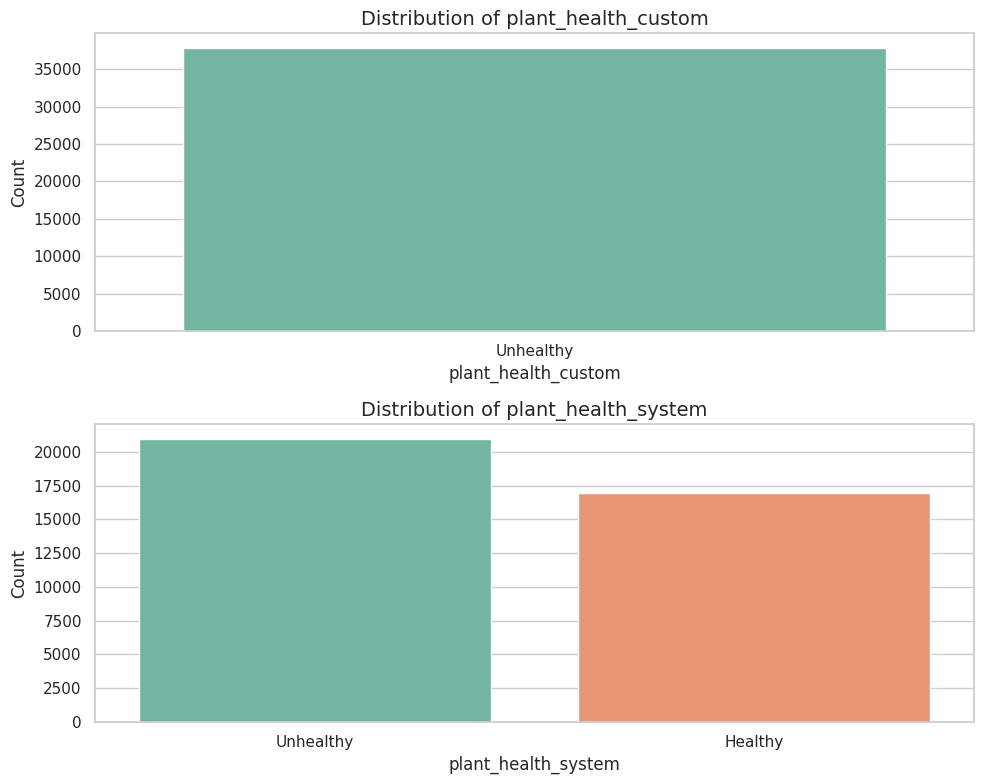

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Re-setting up the plot style for improved aesthetics
sns.set(style="whitegrid", palette="muted")

# Univariate analysis for numeric columns
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(15, len(numeric_columns)*3))
axes = axes.flatten()

# Using a different color palette for variety
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Univariate analysis for categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns)*4))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Bivariate Analysis

<ipython-input-25-4fe247024fa6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plant_health_system', y=column, data=df, ax=axes[i], palette="Set3")
<ipython-input-25-4fe247024fa6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plant_health_system', y=column, data=df, ax=axes[i], palette="Set3")
<ipython-input-25-4fe247024fa6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plant_health_system', y=column, data=df, ax=axes[i], palette="Set3")
<ipython-input-25-4fe247024fa6>:15: FutureWarning: 

Passing `palette` without assign

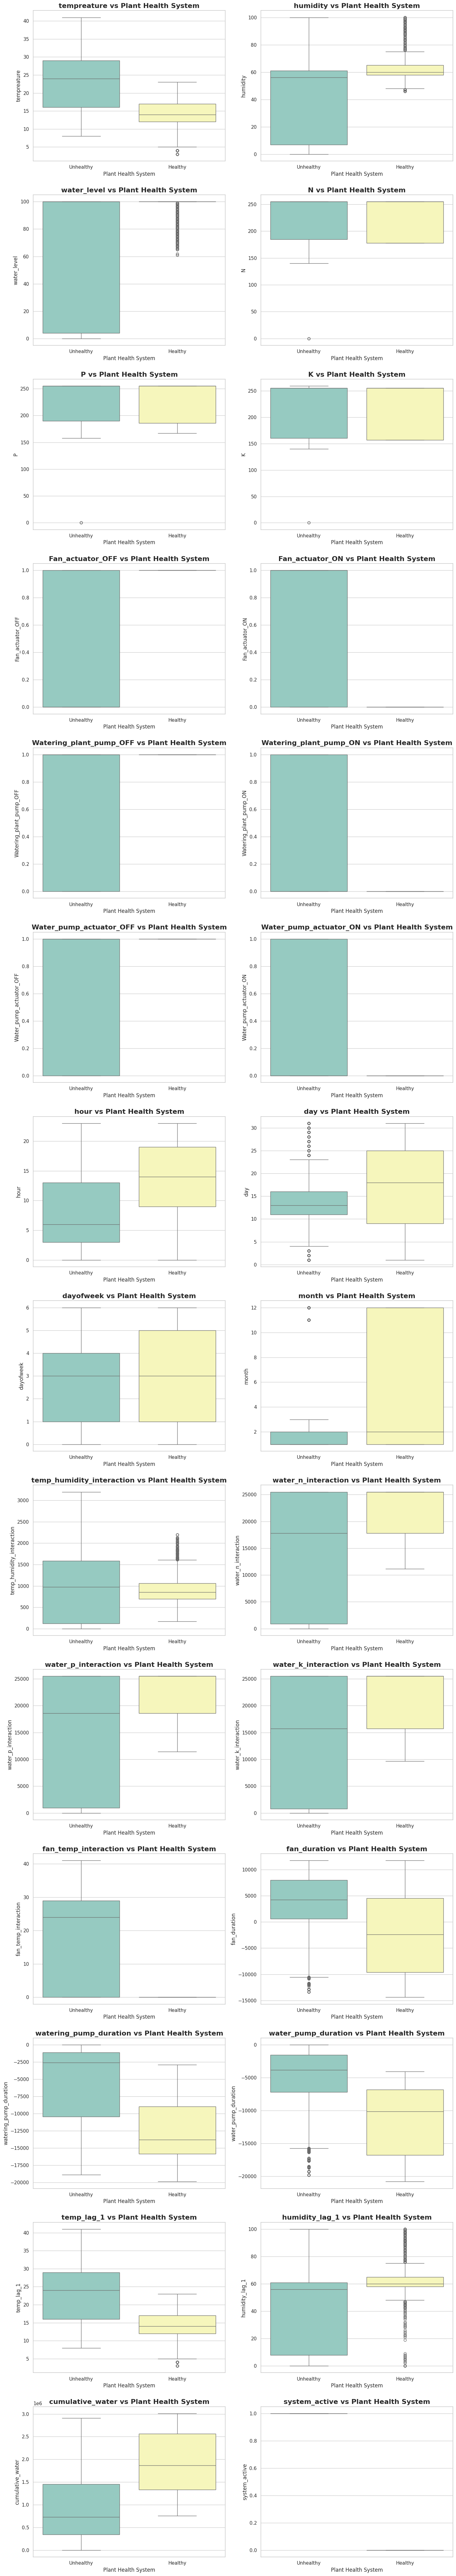

In [25]:
# Importing libraries again in case the environment has been reset
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a more appealing style for the plots
sns.set(style="whitegrid", palette="pastel")

# Boxplot analysis: Numeric features vs plant_health_system with improved aesthetics
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(15, len(numeric_columns)*3))
axes = axes.flatten()

# Using a soft palette and adjusting titles/labels
for i, column in enumerate(numeric_columns):
    if column != 'plant_health_system_encoded':  # Exclude the encoded target
        sns.boxplot(x='plant_health_system', y=column, data=df, ax=axes[i], palette="Set3")
        axes[i].set_title(f'{column} vs Plant Health System', fontsize=16, weight='bold')
        axes[i].set_xlabel('Plant Health System', fontsize=12)
        axes[i].set_ylabel(column, fontsize=12)

# Adjusting layout for readability
plt.tight_layout()
plt.show()

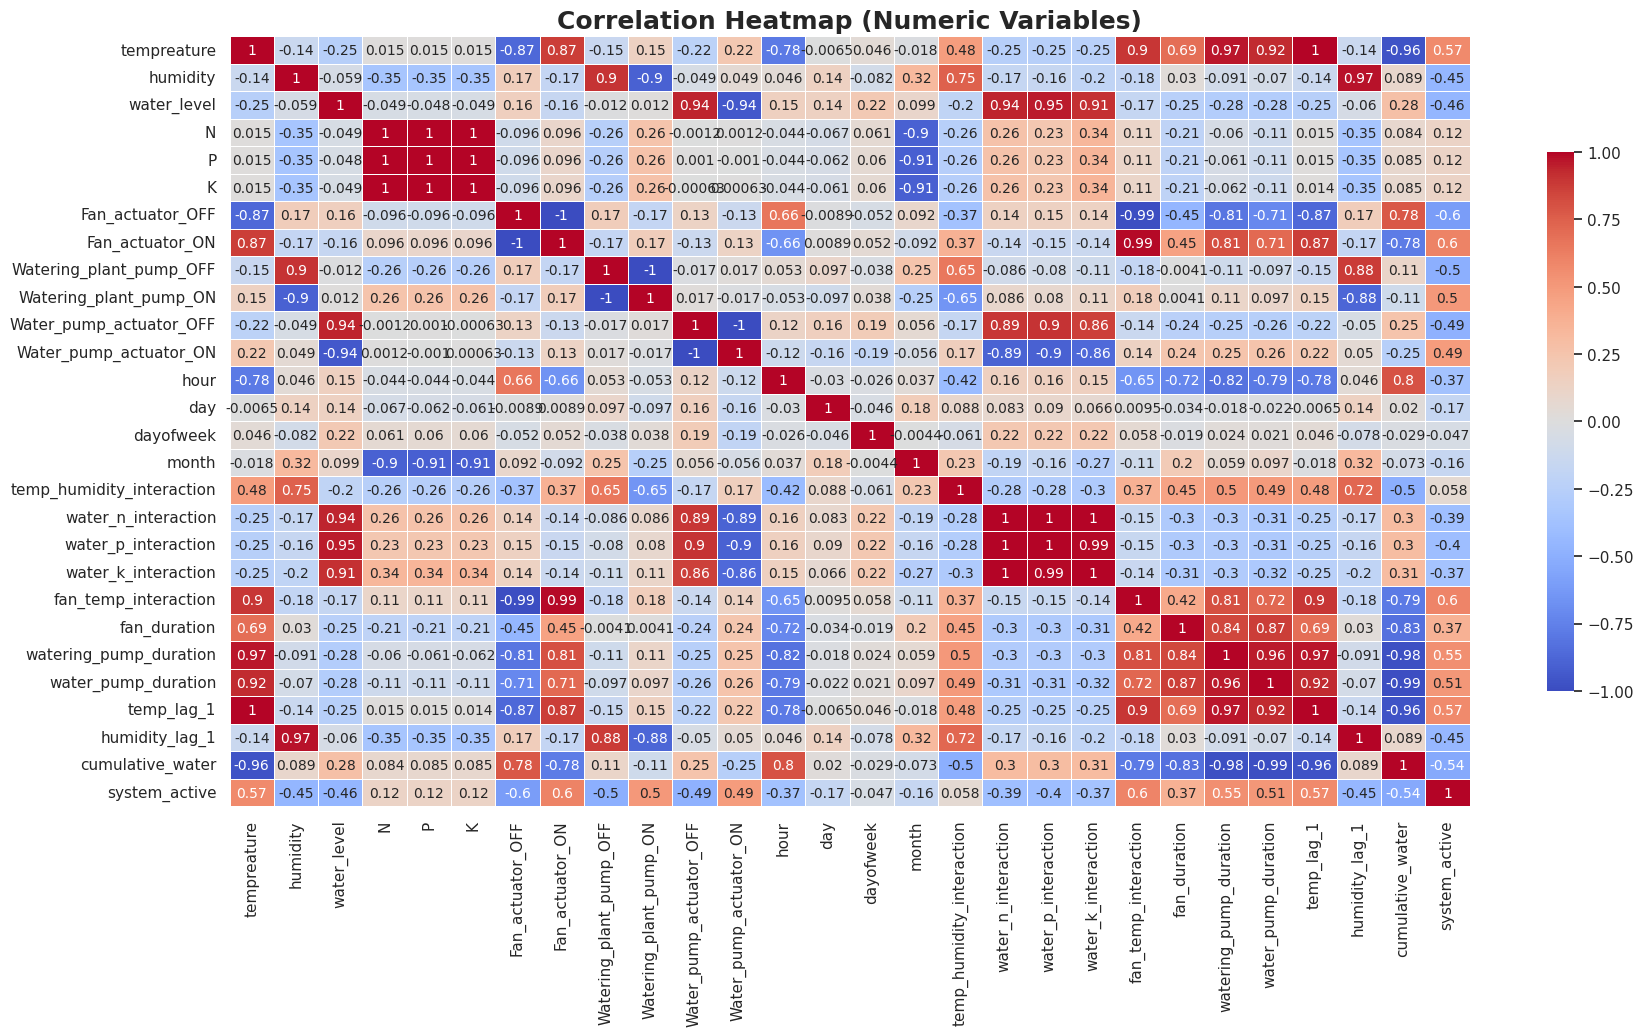

In [28]:
# Correlation heatmap for numeric variables with enhanced aesthetics
plt.figure(figsize=(20, 10))
corr_matrix = df[numeric_columns].corr()

# Improved heatmap with a better color scheme and larger annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.7}, annot_kws={"size": 10})
plt.title('Correlation Heatmap (Numeric Variables)', fontsize=18, weight='bold')
plt.show()

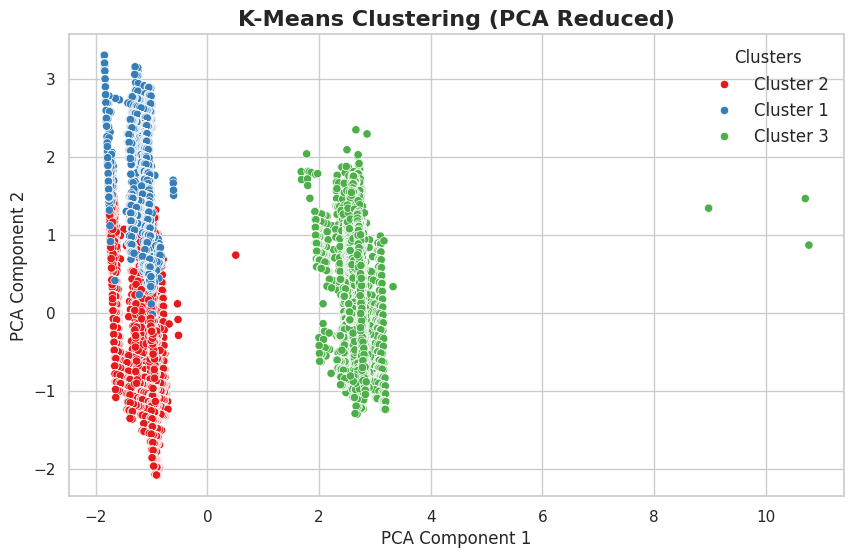

In [31]:
# Let's update the plot with more meaningful cluster labels for better interpretation

# Assign meaningful names to clusters for the legend
cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
df_pca['cluster_label'] = df_pca['cluster'].map(cluster_labels)

# Replotting with more meaningful cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_label', data=df_pca, palette='Set1')
plt.title('K-Means Clustering (PCA Reduced)', fontsize=16, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', loc='best', fontsize=12)
plt.show()


<ipython-input-32-bdccae5709a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_pca.join(df[features_to_plot]), palette='Set3')
<ipython-input-32-bdccae5709a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_pca.join(df[features_to_plot]), palette='Set3')
<ipython-input-32-bdccae5709a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_pca.join(df[features_to_plot]), palette='Set3')
<ipython-input-32-bdccae5709a1>:8: FutureWarni

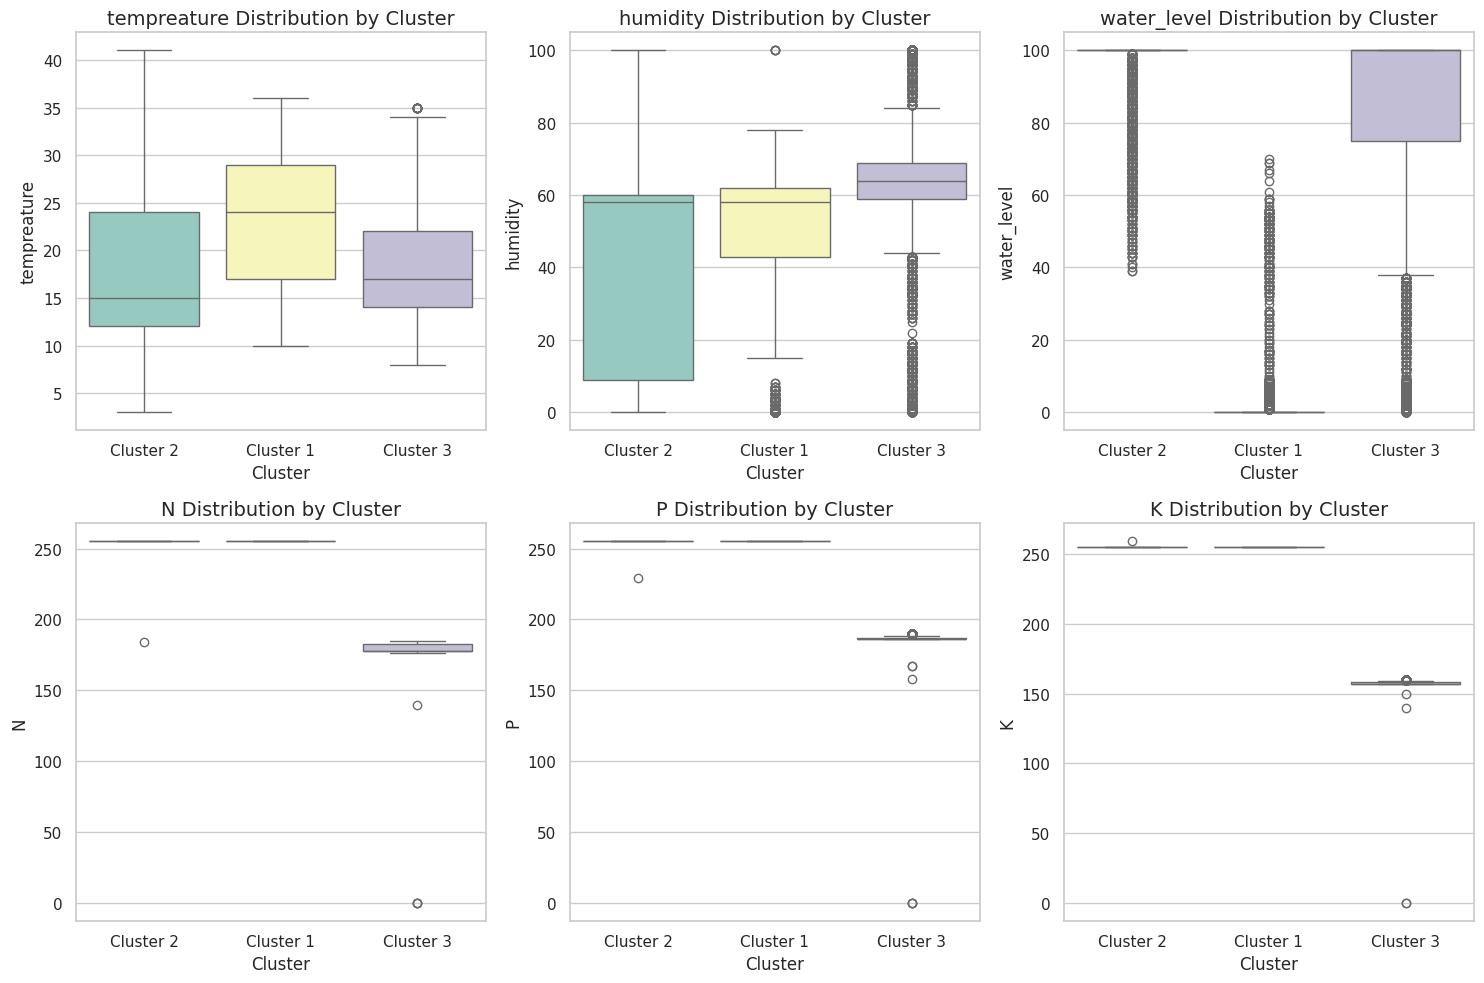

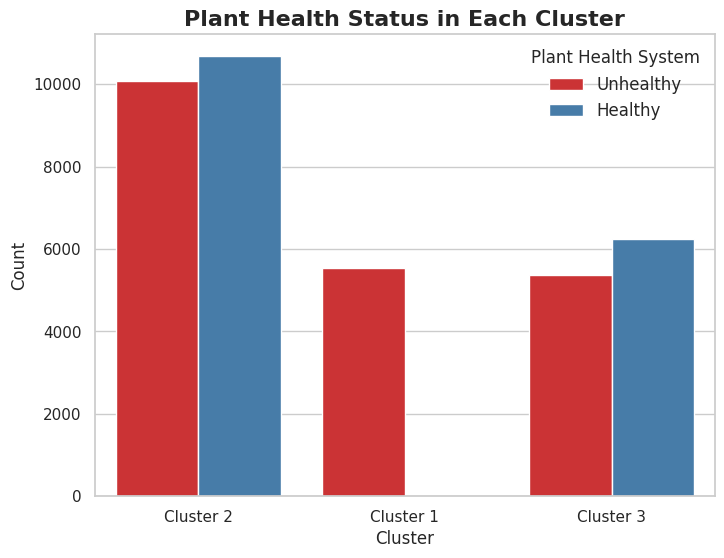

In [32]:
# Step 1: Feature Distributions by Cluster (Boxplots for key features)
features_to_plot = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']

# Creating boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster_label', y=feature, data=df_pca.join(df[features_to_plot]), palette='Set3')
    plt.title(f'{feature} Distribution by Cluster', fontsize=14)
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Step 2: Relationship Between Clusters and Plant Health (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_label', hue='plant_health_system', data=df_pca.join(df[['plant_health_system']]), palette='Set1')
plt.title('Plant Health Status in Each Cluster', fontsize=16, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Plant Health System', loc='best', fontsize=12)
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         37922 non-null  datetime64[ns]
 1   tempreature                  37922 non-null  int64         
 2   humidity                     37922 non-null  int64         
 3   water_level                  37922 non-null  int64         
 4   N                            37922 non-null  int64         
 5   P                            37922 non-null  int64         
 6   K                            37922 non-null  int64         
 7   Fan_actuator_OFF             37922 non-null  int64         
 8   Fan_actuator_ON              37922 non-null  int64         
 9   Watering_plant_pump_OFF      37922 non-null  int64         
 10  Watering_plant_pump_ON       37922 non-null  int64         
 11  Water_pump_actuator_OFF      37922 non-nu

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5104
           1       0.79      0.74      0.77      6273

    accuracy                           0.75     11377
   macro avg       0.75      0.75      0.75     11377
weighted avg       0.75      0.75      0.75     11377



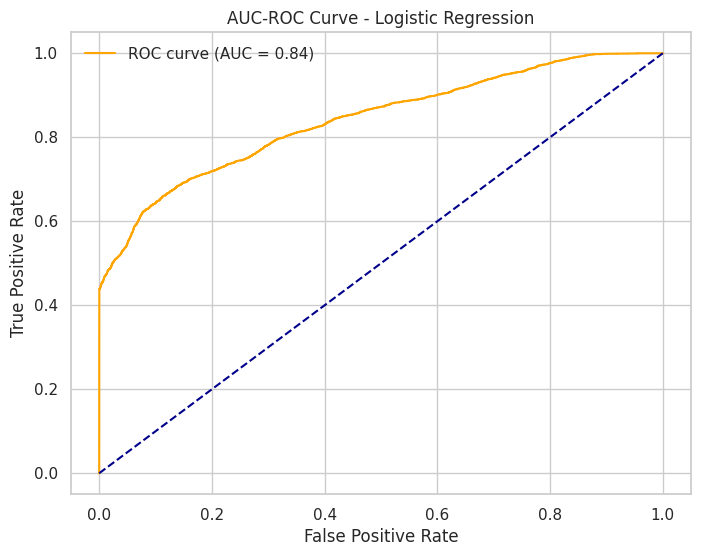

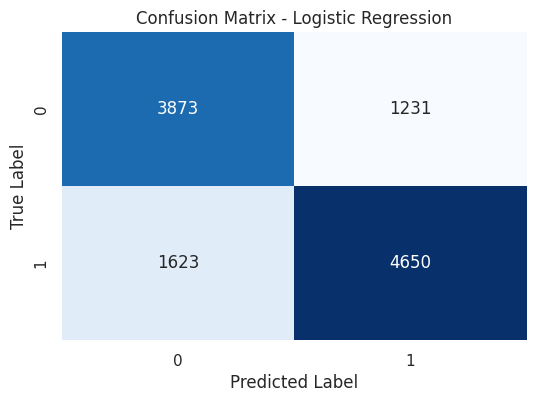

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5104
           1       1.00      1.00      1.00      6273

    accuracy                           1.00     11377
   macro avg       1.00      1.00      1.00     11377
weighted avg       1.00      1.00      1.00     11377



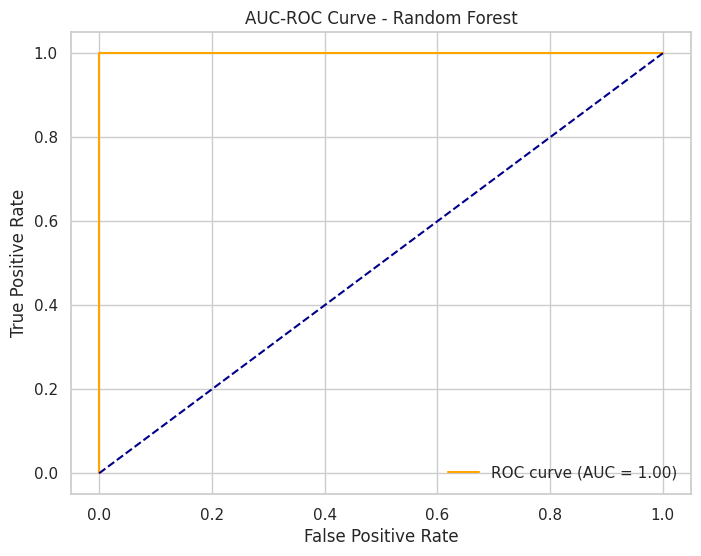

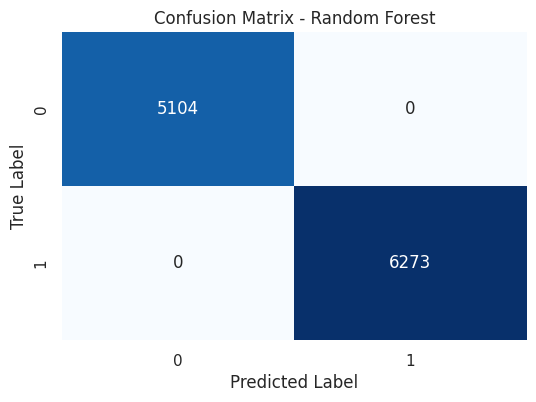

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5104
           1       1.00      1.00      1.00      6273

    accuracy                           1.00     11377
   macro avg       1.00      1.00      1.00     11377
weighted avg       1.00      1.00      1.00     11377



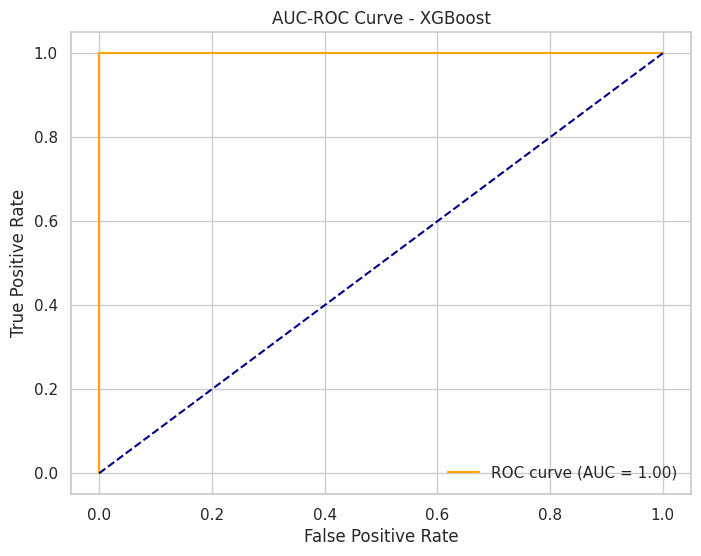

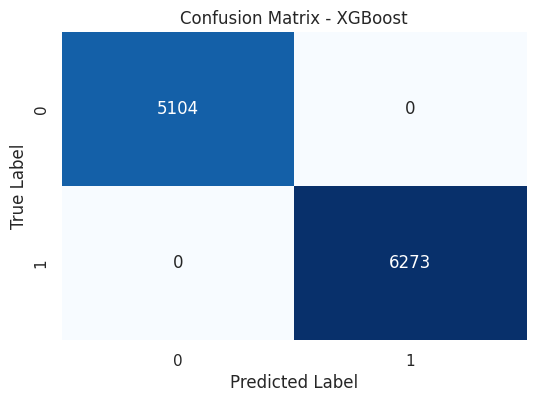

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5104
           1       1.00      1.00      1.00      6273

    accuracy                           1.00     11377
   macro avg       1.00      1.00      1.00     11377
weighted avg       1.00      1.00      1.00     11377



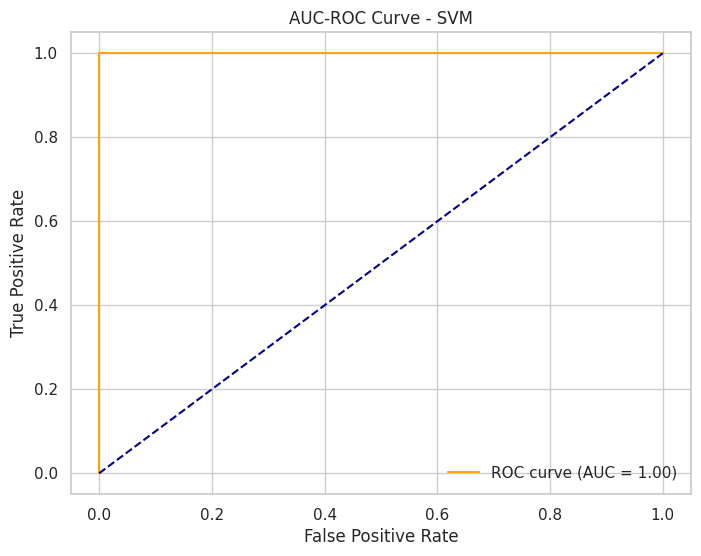

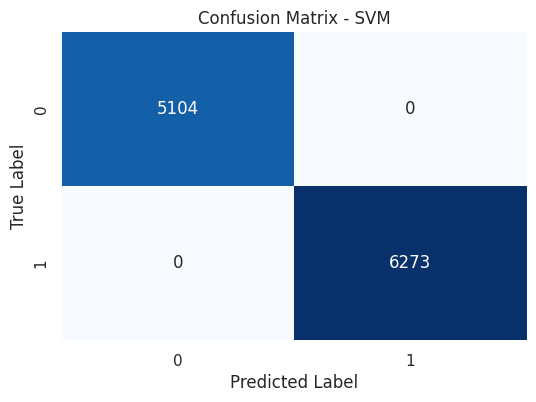

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5104
           1       1.00      1.00      1.00      6273

    accuracy                           1.00     11377
   macro avg       1.00      1.00      1.00     11377
weighted avg       1.00      1.00      1.00     11377



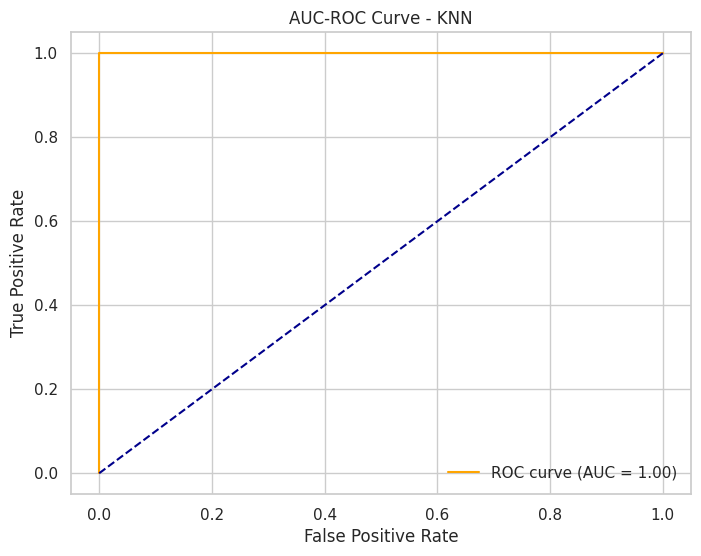

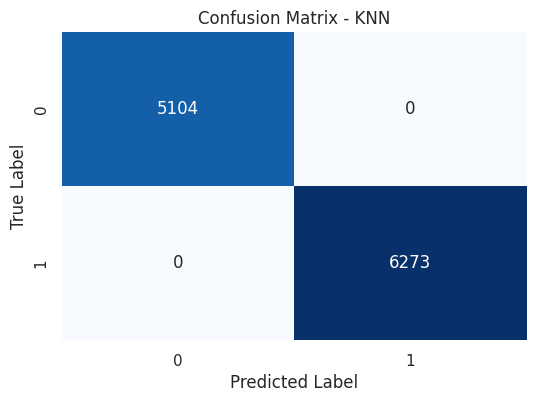

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Function to plot AUC-ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC-ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Step 1: Preparing the data again with the provided column names
# Fix: Ensure that only numeric columns are included for scaling

# Drop non-numeric columns and keep only numeric features
X = df.select_dtypes(include=[np.number]).drop(columns=['plant_health_system_encoded'])  # Keep only numeric columns
y = df['plant_health_system_encoded']  # Target (encoded plant health)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for models like KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    if model_name in ['SVM', 'KNN']:  # Use scaled data for these models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

    # Print classification report
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, y_pred))

    # Compute AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plot_roc_curve(fpr, tpr, model_name)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)



 99%|===================| 22537/22754 [00:47<00:00]       

Shape of SHAP values: (11377, 29, 2)


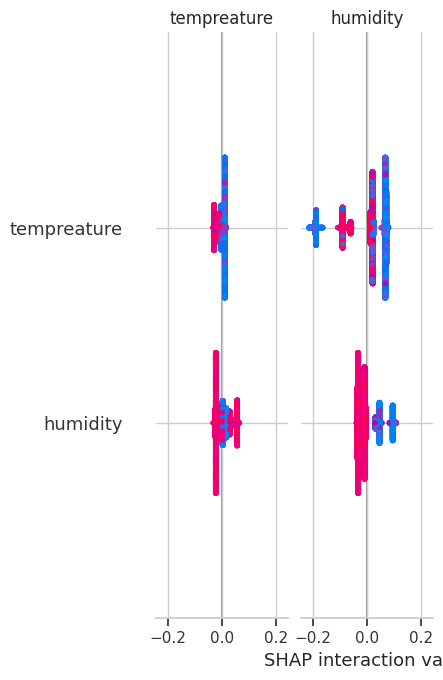

In [42]:
# Use shap.Explainer for better compatibility with binary classification models
explainer = shap.Explainer(rf_model, X_train)  # Pass training data to the explainer
shap_values = explainer(X_test)  # Calculate SHAP values for the test set

# Print the shape of SHAP values
print(f"Shape of SHAP values: {shap_values.shape}")  # Should match X_test

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

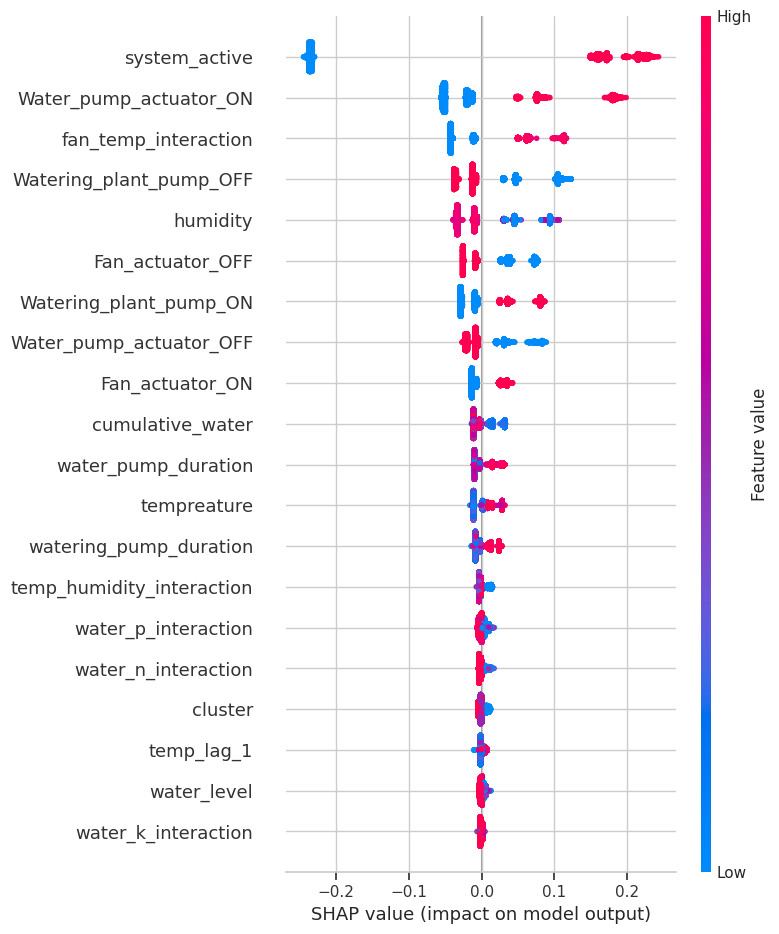

In [43]:
# Extract SHAP values for the positive class (class 1)
shap_values_class1 = shap_values[:, :, 1]

# Plot SHAP summary for the positive class
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns)

 98%|===================| 22302/22754 [00:46<00:00]       

Shape of SHAP values: (11377, 29, 2)


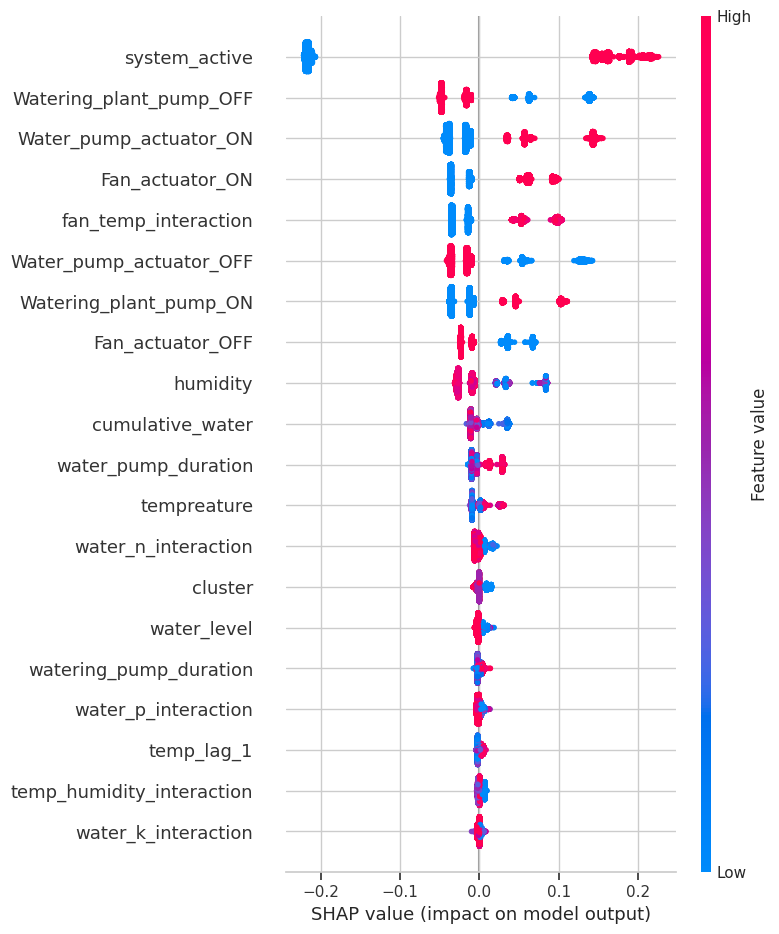

In [44]:
# Import necessary libraries
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Preparing the data
# Dropping only necessary columns for modeling
X = df.select_dtypes(include=[np.number]).drop(columns=['plant_health_system_encoded'])
y = df['plant_health_system_encoded']  # Target (encoded plant health)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 4: SHAP Explainer for model interpretation
explainer = shap.Explainer(rf_model, X_train)  # Create SHAP explainer with training data
shap_values = explainer(X_test)  # Compute SHAP values for the test set

# Check the shape of SHAP values
print(f"Shape of SHAP values: {shap_values.shape}")  # Should be (11377, 29, 2)

# Step 5: Plot SHAP summary for the positive class
# Extract SHAP values for the positive class (class 1)
shap_values_class1 = shap_values[:, :, 1]

# Plot SHAP summary for the positive class
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns)

In [45]:
# Import necessary libraries for LIME
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Preparing the data (similar to the SHAP implementation)
# Dropping only necessary columns for modeling
X = df.select_dtypes(include=[np.number]).drop(columns=['plant_health_system_encoded'])
y = df['plant_health_system_encoded']  # Target (encoded plant health)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 4: Apply LIME for local interpretation on the first instance
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Healthy', 'Unhealthy'],
    discretize_continuous=True
)

# Step 5: Explain the first instance from the test set using LIME
# Use the first instance in the test set for LIME
lime_exp = lime_explainer.explain_instance(X_test.iloc[0].values, rf_model.predict_proba, num_features=10)

# Display LIME explanation
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
